## Decisive Distributions

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
help(tradeapi.REST)


Help on class REST in module alpaca_trade_api.rest:

class REST(builtins.object)
 |  REST(key_id: str = None, secret_key: str = None, base_url: alpaca_trade_api.common.URL = None, api_version: str = None, oauth=None, raw_data: bool = False)
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, exc_type, exc_val, exc_tb)
 |  
 |  __init__(self, key_id: str = None, secret_key: str = None, base_url: alpaca_trade_api.common.URL = None, api_version: str = None, oauth=None, raw_data: bool = False)
 |      :param raw_data: should we return api response raw or wrap it with
 |                       Entity objects.
 |  
 |  add_to_watchlist(self, watchlist_id: str, symbol: str) -> alpaca_trade_api.entity.Watchlist
 |      Add an asset to the watchlist
 |  
 |  cancel_all_orders(self) -> None
 |      Cancel all open orders
 |  
 |  cancel_order(self, order_id: str) -> None
 |      Cancel an order
 |  
 |  close(self)
 |  
 |  close_all_positions(self) -> List[alpaca_trad

In [3]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [4]:
help(api.get_bars)

Help on method get_bars in module alpaca_trade_api.rest:

get_bars(symbol: Union[str, List[str]], timeframe: alpaca_trade_api.rest.TimeFrame, start: Optional[str] = None, end: Optional[str] = None, adjustment: str = 'raw', limit: int = None, feed: Optional[str] = None, asof: Optional[str] = None, sort: Optional[alpaca_trade_api.rest.Sort] = None) -> alpaca_trade_api.entity_v2.BarsV2 method of alpaca_trade_api.rest.REST instance



### Read in stock data using Alpaca API

In [5]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ['SPY', 'LUV', 'DIS', 'AAPL', 'SBUX', 'WORK']

# Get 1 year's worth of historical data for all stocks
# HINT: Set "limit" to 10000 so all ticker rows are captured from get_bars()
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 10000
).df

# Display sample data
df_ticker.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2019-05-01 04:00:00+00:00,210.52,215.3100,209.230,441448,209.88,68138465,212.562482,AAPL
2019-05-02 04:00:00+00:00,209.15,212.6500,208.130,233408,209.84,33437264,210.120827,AAPL
2019-05-03 04:00:00+00:00,211.75,211.8400,210.230,148241,210.89,23050067,211.199402,AAPL
2019-05-06 04:00:00+00:00,208.48,208.8400,203.500,236170,204.29,34940726,207.310877,AAPL
2019-05-07 04:00:00+00:00,202.86,207.4175,200.825,294535,205.88,41821244,203.538692,AAPL


In [6]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
LUV = df_ticker[df_ticker['symbol']=='LUV'].drop('symbol', axis=1)
DIS = df_ticker[df_ticker['symbol']=='DIS'].drop('symbol', axis=1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
SBUX = df_ticker[df_ticker['symbol']=='SBUX'].drop('symbol', axis=1)
WORK = df_ticker[df_ticker['symbol']=='WORK'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, LUV, DIS, AAPL, SBUX, WORK], axis=1, keys=["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"])
# Display sample data
df_ticker.head()

SPY                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-05-01 04:00:00+00:00  291.82  294.95  291.8000      337375  294.72   
2019-05-02 04:00:00+00:00  291.13  292.70  289.5200      342562  291.68   
2019-05-03 04:00:00+00:00  293.98  294.34  291.2998      249403  292.82   
2019-05-06 04:00:00+00:00  292.83  293.31  288.9000      390956  289.25   
2019-05-07 04:00:00+00:00  288.05  290.81  285.8100      618591  290.15   

                                                    LUV                 ...  \
                              volume        vwap  close   high     low  ...   
timestamp                                                               ...   
2019-05-01 04:00:00+00:00   72689383  293.435567  53.90  54.61  53.855  ...   
2019-05-02 04:00:00+00:00   66830633  291.103704  53.37  54.49  53.360  ...   
2019-05-03 04:00:00+00:00   57828940  293.452120  53.62  53.93  53.285  ...   
2019-05-06 04:00:00+00:00  117885315  292.031662  53.48  53.61  52.720  ...   
2019-05-07 04:00:00+00:00  148103972  288.275352  52.21  53.12  51.450  ...   

                            SBUX                      WORK           \
                            open   volume       vwap close high low   
timestamp                                                             
2019-05-01 04:00:00+00:00  77.67  7175353  77.674804   NaN  NaN NaN   
2019-05-02 04:00:00+00:00  77.66  6636948  77.284271   NaN  NaN NaN   
2019-05-03 04:00:00+00:00  77.59  5362489  78.006921   NaN  NaN NaN   
2019-05-06 04:00:00+00:00  77.20  6042660  77.742310   NaN  NaN NaN   
2019-05-07 04:00:00+00:00  77.57  8851747  78.040463   NaN  NaN NaN   

                                                        
                          trade_count open volume vwap  
timestamp                                               
2019-05-01 04:00:00+00:00         NaN  NaN    NaN  NaN  
2019-05-02 04:00:00+00:00         NaN  NaN    NaN  NaN  
2019-05-03 04:00:00+00:00         NaN  NaN    NaN  NaN  
2019-05-06 04:00:00+00:00         NaN  NaN    NaN  NaN  
2019-05-07 04:00:00+00:00         NaN  NaN    NaN  NaN  

[5 rows x 42 columns]

### Create a new DataFrame and store the closing prices of each stock.

In [7]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
# Use a loop to iterate through the tickers list
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]['close']

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-05-01,291.82,53.90,136.38,210.52,77.52,NaN
2019-05-02,291.13,53.37,134.14,209.15,77.47,NaN
2019-05-03,293.98,53.62,134.33,211.75,78.05,NaN
2019-05-06,292.83,53.48,135.00,208.48,78.06,NaN
2019-05-07,288.05,52.21,133.44,202.86,77.96,NaN


### Calculate the daily returns for each stock using the `pct_change()` function

In [8]:
# Compute daily returns
# Check for na and drop
df_closing_prices.isnull().sum()
df_closing_prices = df_closing_prices.dropna()
df_closing_prices

df_daily_returns = df_closing_prices.pct_change()
df_daily_returns = df_daily_returns.dropna()

# Display sample data
df_daily_returns.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-06-21,-0.006354,-0.005241,-0.012604,-0.003409,-0.010273,-0.036251
2019-06-24,-0.001156,-0.000585,-0.007202,-0.001006,-0.002028,-0.039226
2019-06-25,-0.009807,-0.004295,0.005172,-0.015158,0.007173,-0.015660
2019-06-26,-0.000929,-0.005882,0.003287,0.021629,-0.010326,0.056534
2019-06-27,0.003477,0.000789,-0.007835,-0.000300,0.002159,-0.025276


### Plot Distributions

<Axes: ylabel='Frequency'>

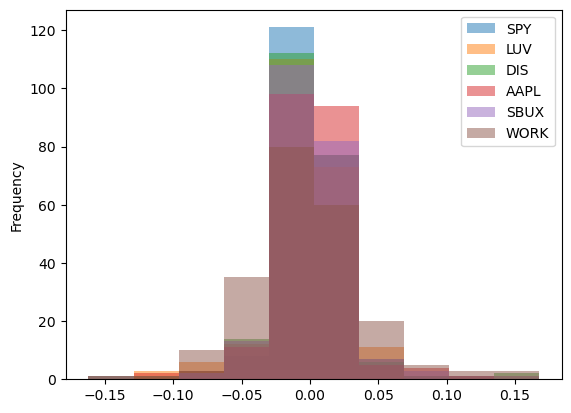

In [9]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
df_daily_returns.plot(kind ='hist', alpha = 0.5)

<Axes: ylabel='Density'>

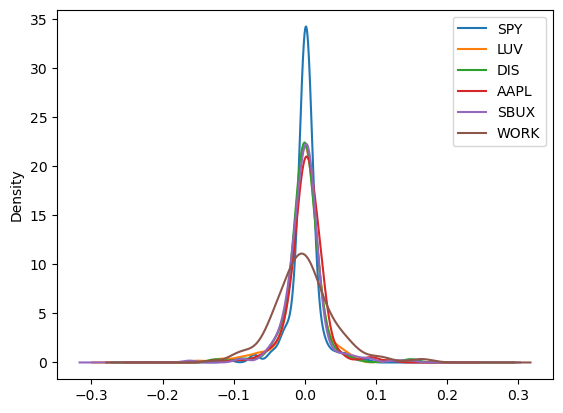

In [10]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns.plot(kind ='density')